### Support Vector Machines (SVM)

### Hyperplane,Margin,Support Vectors
### Real-life Analogy (Cricket Fans Example)

Imagine you’re at a cricket stadium:

On one side are CSK fans in yellow 🟡.

On the other side are RCB fans in red 🔴.

You want to put a rope between them.

Now:

If you put the rope too close to CSK fans → unfair, some yellow fans might cross.

If you put the rope too close to RCB fans → unfair again.

The fairest rope is the one that is exactly in the middle, with maximum space on both sides.

### The fans standing closest to the rope are support vectors.

### ✅ That rope = hyperplane
### ✅ The space on both sides = margin

### Linear SVM (Straight line boundary)

Works when data can be separated by a straight line (or plane in higher dimensions).

Fast, simple, and easy to understand.

👉 Example:
You’re classifying people into tall vs short based only on height.

A simple straight line at “170 cm” can separate the two groups.

Anyone above → tall, anyone below → short.
✅ That’s a linear boundary.

### 🌟 Non-linear SVM (Kernel trick)

Real-life data is often not separable by a straight line.

Non-linear SVM uses a kernel function to map data into higher dimensions, where a straight line can separate them.

👉 Example:
You want to separate fruits 🍎🍊 by size:

Some apples and oranges overlap in weight/size → no straight line works.

But if you add another feature (like color), suddenly it becomes easy.

Kernel trick does this mathematically → without us manually adding features.

Example 1: Job Hiring
Linear SVM

Company wants to classify applicants as Hired or Not Hired based only on:

Years of experience

Score in aptitude test

👉 If candidates with higher experience & test scores always get hired → a straight line can separate them.

Non-linear SVM

But suppose some very young prodigies with low experience but high test scores also get hired.
Now the boundary is curved (experience isn’t the only factor).
👉 Here we need a non-linear kernel to separate them correctly.

Example 3: Students Passing Exam
Linear SVM

Predict pass/fail from:

Study hours

Attendance

👉 More study + more attendance = pass → a straight line works.

Non-linear SVM

But some very smart students pass with little study, and some weak students fail despite high attendance.
So the data forms curves.
👉 Non-linear SVM (like RBF kernel) creates a curved boundary that handles these exceptions.

### 🎯 Analogy Recap

Linear SVM = separating groups with a straight line.

Non-linear SVM (kernel trick) = separating groups when they are tangled or circular, by bending the boundary.

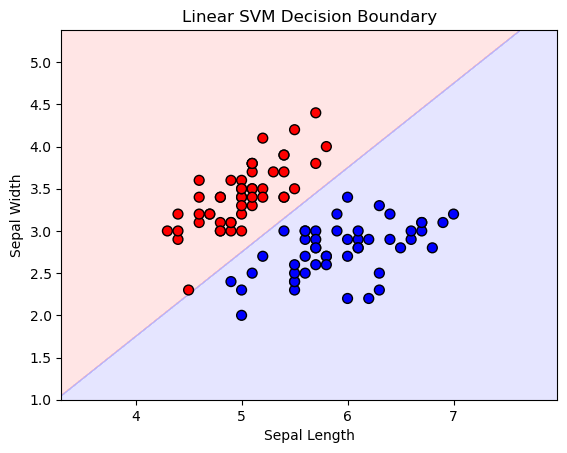

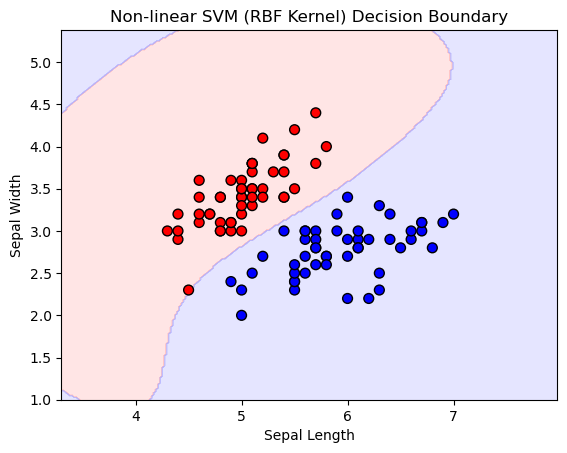

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# Load dataset (Iris - 2 features for visualization)
iris = datasets.load_iris()
X = iris.data[:, :2]   # sepal length & width
y = iris.target

# Use only 2 classes (e.g., class 0 and 1) for easy plotting
X = X[y != 2]
y = y[y != 2]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Linear SVM
linear_svm = SVC(kernel="linear", C=1.0)
linear_svm.fit(X_train, y_train)

# Train Non-linear SVM (RBF kernel)
rbf_svm = SVC(kernel="rbf", gamma=1, C=1.0)
rbf_svm.fit(X_train, y_train)

# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA','#AAAAFF']))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=50, cmap=ListedColormap(['#FF0000','#0000FF']))
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.title(title)
    plt.show()

# Plot Linear SVM
plot_decision_boundary(linear_svm, X, y, "Linear SVM Decision Boundary")

# Plot Non-linear SVM
plot_decision_boundary(rbf_svm, X, y, "Non-linear SVM (RBF Kernel) Decision Boundary")


In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Linear SVM
linear_svm = SVC(kernel="linear", C=1.0)
linear_svm.fit(X_train, y_train)

# Predictions
y_pred = linear_svm.predict(X_test)
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred))

rbf_svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
rbf_svm.fit(X_train, y_train)

y_pred = rbf_svm.predict(X_test)
print("RBF Kernel SVM Accuracy:", accuracy_score(y_test, y_pred))

poly_svm = SVC(kernel="poly", degree=3, C=1.0)
poly_svm.fit(X_train, y_train)

y_pred = poly_svm.predict(X_test)
print("Polynomial Kernel Accuracy:", accuracy_score(y_test, y_pred))


Linear SVM Accuracy: 1.0
RBF Kernel SVM Accuracy: 1.0
Polynomial Kernel Accuracy: 0.9777777777777777


### linear_svm = SVC(kernel="linear", C=1.0)
linear_svm.fit(X_train, y_train)
### rbf_svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
rbf_svm.fit(X_train, y_train)